In [1]:
import pandas as pd
import stats
import importlib
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sstat

In [2]:
importlib.reload(stats)

<module 'stats' from '/Users/jrod/Documents/Courses/Current/CSS-6471/code/stats.py'>

In [3]:
df = pd.read_csv('../data/location.csv')

#add year variable for plotting
df['Year'] = df['date'].str.slice(0,4)

In [416]:
stat_df = stats.StatsDF(df)

In [166]:
importlib.reload(stats)
stat_df = stats.StatsDF(df)
chisq, pvalue = stat_df.chisquare('tox_binned', 'tox_binned', 'years', 'two-sided')
print(chisq, pvalue)

1175.626612080646 5.199059615980793e-256


Text(0.5, 1.0, 'Toxicity Density Across Years')

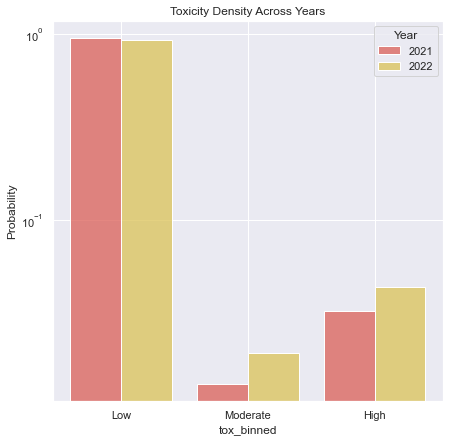

In [539]:
#ask about log scale
sns.set_palette(sns.color_palette("hls", 8))
f, ax = plt.subplots(figsize=(7, 7))
ax.set(yscale="log")
sns.histplot(x='tox_binned',hue='Year', stat='probability', multiple='dodge', data=df, ax=ax, shrink=0.8, common_norm=False).set_title('Toxicity Density Across Years')

In [168]:
chisq, pvalue = stat_df.chisquare('sent_binned', 'sent_binned', 'years', 'two-sided')
print(chisq, pvalue)

20152.139002326778 0.0


<AxesSubplot:xlabel='sent_binned', ylabel='Probability'>

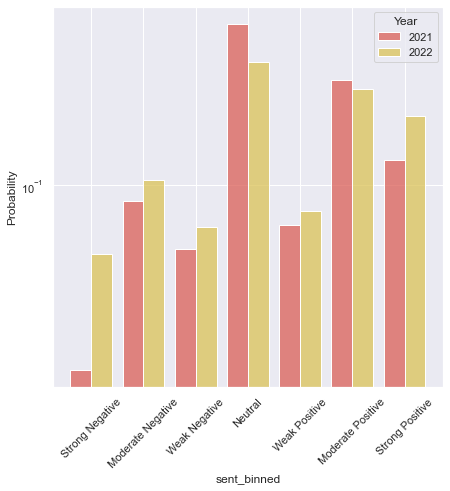

In [521]:
#ask about log scale
sns.set_palette(sns.color_palette("hls", 8))
df['sent_binned'] = pd.Categorical(df['sent_binned'], ['Strong Negative','Moderate Negative','Weak Negative','Neutral', 'Weak Positive', 'Moderate Positive', 'Strong Positive'])
f, ax = plt.subplots(figsize=(7, 7))
ax.set(yscale="log")
ax.tick_params(axis='x', rotation=45)
sns.histplot(x='sent_binned',hue='Year', stat='probability', multiple='dodge', data=df, ax=ax, shrink=0.8, common_norm=False)

In [533]:
importlib.reload(stats)
stat_df = stats.StatsDF(df)
low = 0
high = 101
step = 20


In [534]:
tox_scores = []
sent_scores = []
tox_val_list = []
sent_val_list = []
for i in range(low, high - step, step):
    tox_mean, sent_mean, tox_vals, sent_vals = stat_df.split_popularity(i, i, i + step, i + step)
    tox_scores.append(tox_mean)
    sent_scores.append(sent_mean)
    tox_val_list.append(tox_vals)
    sent_val_list.append(sent_vals)

0 20
20 40
40 60
60 80
80 100


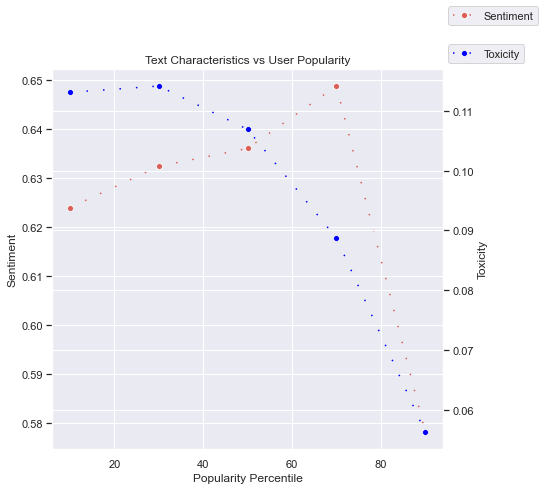

In [538]:
#explicitly set string labels
plt.figure( figsize = (7, 7))
g = sns.lineplot(x=[10, 30, 50, 70, 90],y=sent_scores, linestyle=(0, (1, 10)), marker='o')
plt.legend(labels=['Sentiment'], loc='lower left', bbox_to_anchor=(1,1.1))
g.set_xlabel('Popularity Percentile')
g.set_xticks([0,20,40,60,80,100])
g.set_ylabel('Sentiment')
g.set_title('Text Characteristics vs User Popularity')
g = sns.lineplot(x=[10, 30, 50, 70, 90],y=tox_scores, linestyle=(0, (1, 10)), marker='o', color='blue', ax=plt.twinx())
g.set_ylabel('Toxicity')
plt.legend(labels=['Toxicity'], loc='lower left', bbox_to_anchor=(1,1))

In [537]:
#note, first two toxicity likely from same distribution
#include mann whitney between rest
sstat.kruskal(tox_val_list[0], tox_val_list[1], tox_val_list[2],tox_val_list[3],tox_val_list[4])

KruskalResult(statistic=523.0015031081647, pvalue=7.092463960550464e-112)

In [379]:
sstat.kruskal(sent_val_list[0], sent_val_list[1], sent_val_list[2],sent_val_list[3],sent_val_list[4])

KruskalResult(statistic=49.70400368081039, pvalue=4.163004828721132e-10)

Text(0.5, 1.0, 'Sentiment QQ Plot')

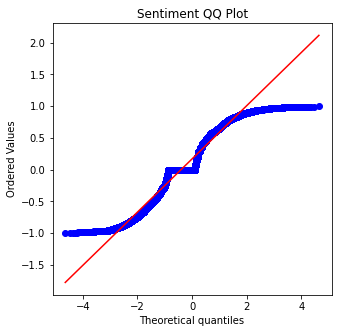

In [395]:
fig = plt.figure(figsize=(5,5))
sstat.probplot(stat_df.full['sentiment'], plot=plt)
plt.title('Sentiment QQ Plot')

Text(0.5, 1.0, 'Toxicity QQ Plot')

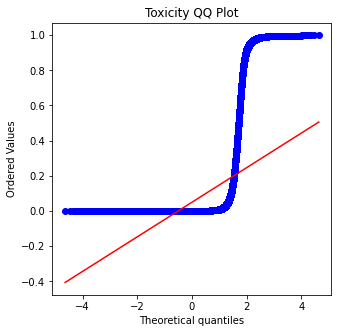

In [394]:
fig = plt.figure(figsize=(5,5))
sstat.probplot(stat_df.full['toxicity'], plot=plt)
plt.title('Toxicity QQ Plot')

Country Analysis

In [6]:
#biased towards events, should be confirmed during LDA
importlib.reload(stats)
stat_df = stats.StatsDF(df)
new_df = stat_df.country_analysis(1000)

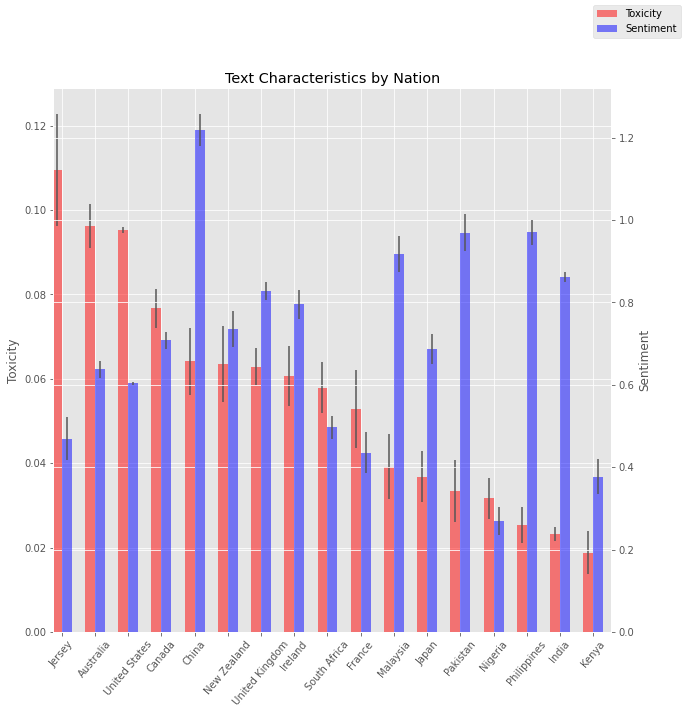

In [80]:
import matplotlib
matplotlib.style.use('ggplot')
fig = plt.figure(figsize=(10,10)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.3

#calculator error
err_df = new_df.groupby(['Country']).describe()
err_df.columns
err_df[('Toxicity', 'se')] = err_df[('Toxicity', 'std')]/np.sqrt(err_df[('Toxicity', 'count')])
err_df[('Sentiment', 'se')] = err_df[('Sentiment', 'std')]/np.sqrt(err_df[('Sentiment', 'count')])

#plot
pivot_df = pd.pivot_table(index='Country', values=['Toxicity','Sentiment'], aggfunc=np.mean, data=new_df).sort_values(by='Toxicity', ascending=False)['Toxicity'].plot(kind='bar', width=width, ax=ax, position=1, color='red', legend=False, rot=50,alpha=0.5, yerr=err_df[('Toxicity', 'se')])

pivot_df = pd.pivot_table(index='Country', values=['Sentiment', 'Toxicity'], aggfunc=np.mean, data=new_df).sort_values(by='Toxicity', ascending=False)['Sentiment'].plot(kind='bar', width=width, ax=ax2, position=0, color='blue',legend=False,alpha=0.5, yerr=err_df[('Sentiment', 'se')])

ax.set_ylabel('Toxicity')
ax2.set_ylabel('Sentiment')
ax2.set_title('Text Characteristics by Nation')
ax.set_xlabel('')

fig.legend()

plt.show()